In [1]:
'''ДЗ по матстату:

1) построить линейную хрень
2) рассчитать средний коэффициент парной кореляцией ро_(x, y) и оверлайн А
3) оценить стат значимость параметрической регрессии и кореляции (по т стьюдента) 
4) выполнить прогноз y при x = 107% от среднего уровня
5) оценить точность прогноза через ошибку прогноза и его доверительный интервал

Выводы по всем пунктам'''

'ДЗ по матстату:\n\n1) построить линейную хрень\n2) рассчитать средний коэффициент парной кореляцией ро_(x, y) и оверлайн А\n3) оценить стат значимость параметрической регрессии и кореляции (по т стьюдента) \n4) выполнить прогноз y при x = 107% от среднего уровня\n5) оценить точность прогноза через ошибку прогноза и его доверительный интервал\n\nВыводы по всем пунктам'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# xs = [78,82,87,79,89,106,67,88,73,87,76,115]
# ys = [133,148,134,154,162,195,139,158,152,162,159,173]
xs = [35, 40, 30, 42, 37, 38, 34, 33, 36, 31, 36, 43, 39, 44]
ys = [162, 174, 155, 172, 173, 166, 162, 160, 167, 153, 163, 173, 168, 176]
n = len(xs)

df = pd.DataFrame({'x': xs, 'y': ys})

x_mean = df.x.mean()
y_mean = df.y.mean()

σx = df.x.std()
σy = df.y.std()
σ = [σx, σy]

b = ((df.x * df.y).mean() - x_mean * y_mean) / σx**2
a = y_mean - b*x_mean

r_xy = b * min(σ) / max(σ)

linreg = lambda t: a + b*t

y_krishechka = linreg(df.x)
dif_y = df.y - y_krishechka

A = (abs(dif_y / df.y)).mean() * 100

print(f'y = {a} + {b}*x')
print(f'r_xy = {r_xy}')
print(f'A = {A}')

y = 112.88958333333332 + 1.4354166666666668*x
r_xy = 0.8591049157226988
A = 1.153101391049929


r<sub>xy</sub> показывает сильную положительную взаимосвязь

A находится в пределах допустимой ошибки аппроксимации

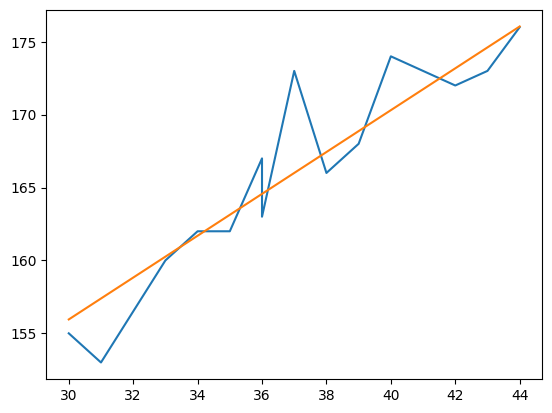

In [3]:
_x = df.sort_values('x')['x']
_y = df.sort_values('x')['y']

plt.plot(_x,_y)

lx = np.linspace(min(_x), max(_x), 100)
ly = linreg(lx)

plt.plot(lx,ly)

In [4]:
mr = ( (1-r_xy**2) / (n-2) )**.5
mb = ( sum(dif_y**2) / sum((df.x - x_mean)**2) / (n-2) )**.5
ma = ( sum(dif_y**2) * sum(df.x**2) / sum((df.x - x_mean)**2) / n / (n-2) )**.5
t_table = 2.23

print(f'ma = {ma}\nmb = {mb}\nmr = {mr}\n')
print(f'ta = {a/ma}\ntb = {b/mb}\ntr = {r_xy/mr}\n')
print(f't_table = {2.23}')

ma = 6.917492969593459
mb = 0.18579958120243426
mr = 0.1477437939421638

ta = 16.319435932866273
tb = 7.725618418389958
tr = 5.814829122765091

t_table = 2.23


a, b и r<sub>xy</sub> не случайно отличаются от 0 и сформированы под влиянием х, гипотеза H<sub>0</sub> об их статистической незначимости отвергается

In [5]:
x_p = 1.07 * x_mean
y_p = linreg(x_p)
m = 1 # пока что так, вроде количество параметров, а вроде и нет

mp = ( sum(dif_y**2) / (n-m-1) )**.5 * ( 1 + 1/n + (x_p - x_mean) / sum((df.x - x_mean)**2) )**.5

Delta_yp = t_table * mp

y_p-Delta_yp, y_p+Delta_yp, x_p, y_p, Delta_yp


(163.04024233481877,
 176.39521599851454,
 39.59,
 169.71772916666666,
 6.677486831847884)